In [3]:
import zipfile

with zipfile.ZipFile('./Invistico_Airline.csv.zip','r') as zip_ref:
    zip_ref.extractall('')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report

In [3]:
data = pd.read_csv('Invistico_Airline.csv')

In [4]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [6]:
y = data['satisfaction']
X = data.drop(['satisfaction'],axis=1)

In [7]:
cateogry_columns = ['Gender','Customer Type','Class','Type of Travel','Flight Distance']

In [8]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for i in cateogry_columns:
    X[i] = lb.fit_transform(X[i])

In [9]:
y = y.apply(lambda x: 1 if x=="satisfied" else 0)

## EDA

In [10]:
y.value_counts()

satisfaction
1    71087
0    58793
Name: count, dtype: int64

In [11]:
X.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,0.492616,0.183092,39.427957,0.309416,0.593864,1886.060202,2.838597,2.990645,2.851994,2.990422,...,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,0.499947,0.386743,15.119360,0.462255,0.621378,1019.324277,1.392983,1.527224,1.443729,1.305970,...,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,1265.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,1831.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,2450.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,5397.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

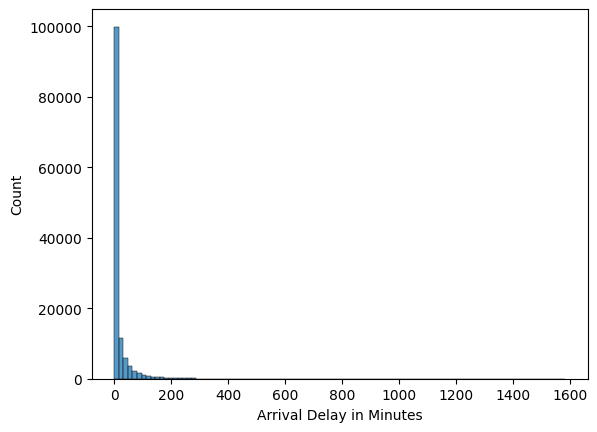

In [12]:
sns.histplot(x = 'Arrival Delay in Minutes',data=X,bins=100)
#0의 비중이 높아 0으로 대치

In [75]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(0)

<Axes: >

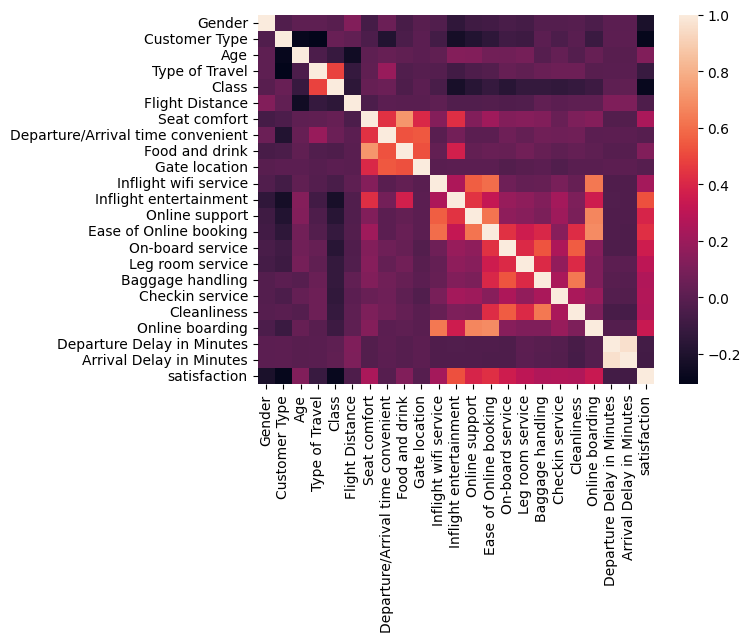

In [14]:
sns.heatmap(pd.concat([X,y],axis=1).corr())

<Axes: xlabel='Inflight entertainment', ylabel='count'>

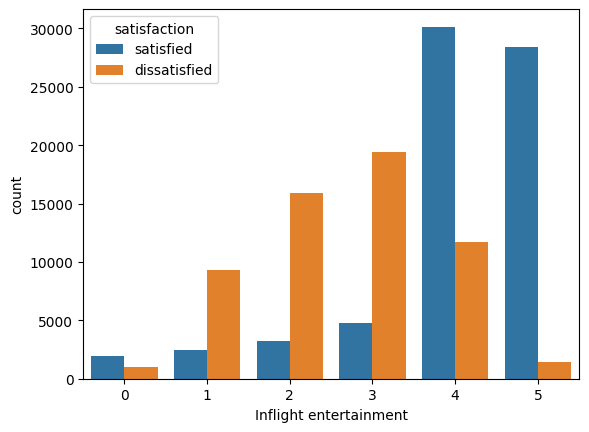

In [15]:
sns.countplot(x= 'Inflight entertainment' ,data=data,hue='satisfaction')

<Axes: xlabel='Ease of Online booking', ylabel='count'>

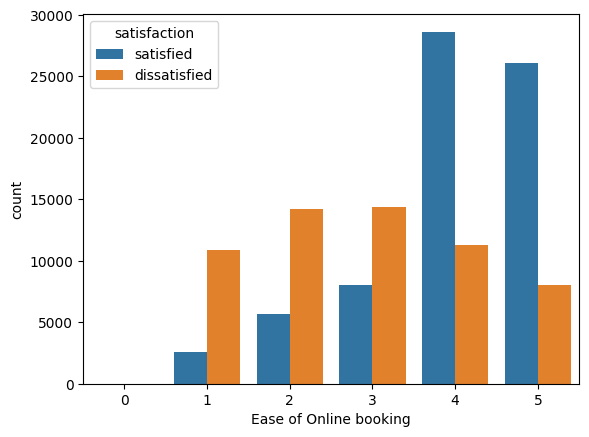

In [16]:
sns.countplot(x= 'Ease of Online booking' ,data=data,hue='satisfaction',hue_order=['satisfied','dissatisfied'] )

<Axes: xlabel='Class', ylabel='count'>

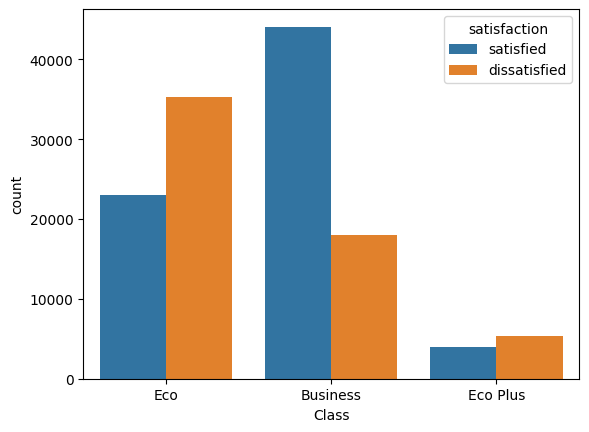

In [17]:
sns.countplot(x= 'Class' ,data=data,hue='satisfaction',hue_order=['satisfied','dissatisfied'] )

In [18]:
data['Seat comfort'].value_counts()

Seat comfort
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: count, dtype: int64

In [19]:
data.loc[data['Seat comfort']==0,:]['satisfaction'].value_counts()

satisfaction
satisfied       4787
dissatisfied      10
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

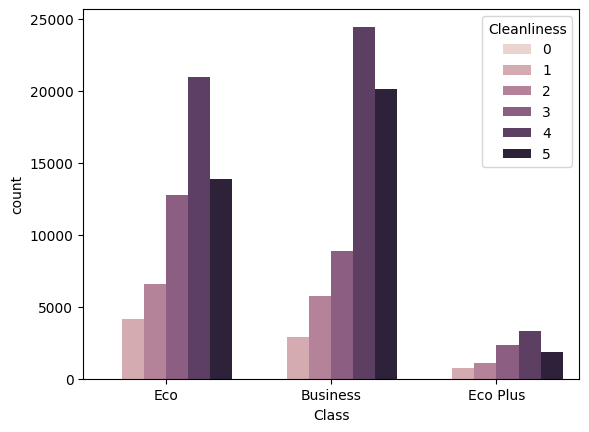

In [20]:
sns.countplot(x= 'Class' ,data=data,hue='Cleanliness')

<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

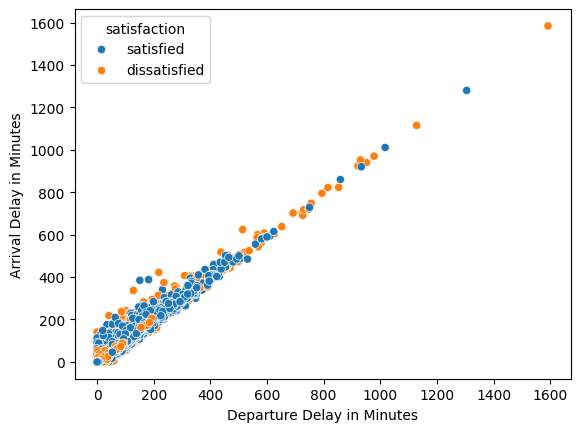

In [21]:
sns.scatterplot(x='Departure Delay in Minutes',y = 'Arrival Delay in Minutes', data=data, hue='satisfaction')

### Feature Selection

In [23]:
data['satisfaction'] = data['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)

In [24]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [25]:
pd.pivot_table(data=data,columns=['Class'],index='Seat comfort',values='satisfaction',aggfunc=np.mean)

Class,Business,Eco,Eco Plus
Seat comfort,,,
0,1.000000,0.997897,0.982507
1,0.665953,0.204513,0.193598
2,0.567796,0.167759,0.172586
3,0.575199,0.167994,0.180163
4,0.781567,0.549814,0.587723
5,0.989745,0.995828,0.988347


In [26]:
pd.pivot_table(data=data,columns=['Class'],index='Inflight entertainment',values='satisfaction',aggfunc=np.mean)

Class,Business,Eco,Eco Plus
Inflight entertainment,,,
0,0.822747,0.599287,0.688427
1,0.372971,0.138558,0.147706
2,0.289342,0.111575,0.129566
3,0.296144,0.134835,0.145201
4,0.817939,0.590736,0.610420
5,0.982084,0.896845,0.932080


<Axes: xlabel='Flight Distance', ylabel='Arrival Delay in Minutes'>

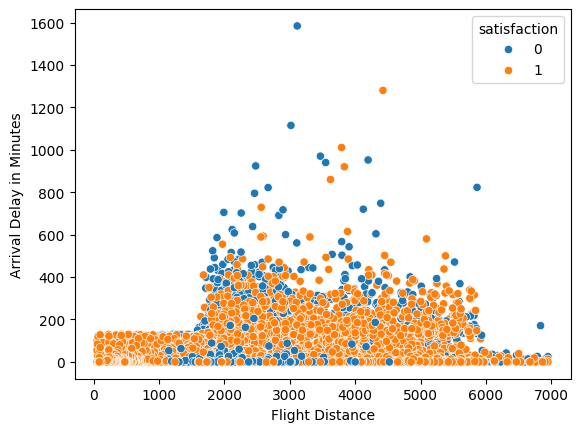

In [27]:
sns.scatterplot(x='Flight Distance', y='Arrival Delay in Minutes', hue = 'satisfaction', data=data)

<Axes: xlabel='Flight Distance', ylabel='Density'>

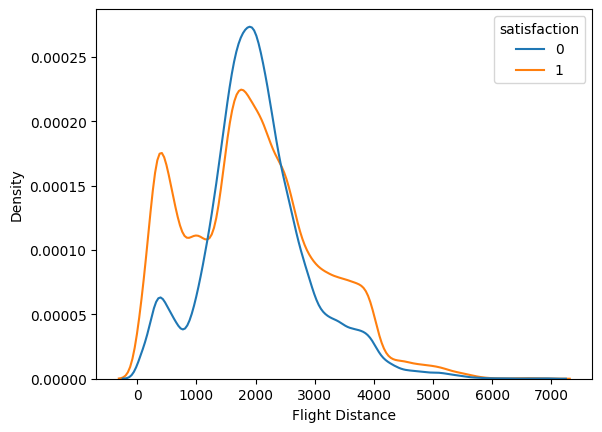

In [28]:
sns.kdeplot(data=data,x='Flight Distance',hue = 'satisfaction')

In [29]:
data['Arrival Delay in Minutes'] - data['Departure Delay in Minutes'] 

0          0.0
1         -5.0
2          0.0
3          0.0
4          0.0
          ... 
129875     0.0
129876    -2.0
129877     8.0
129878    12.0
129879     1.0
Length: 129880, dtype: float64

In [31]:
score_column = []
for i in data.columns:
    if data[i].nunique() in [5,6]:
        score_column.append(i)

In [32]:
for i in score_column:
    data['relative_'+i] = data[i]-np.mean(data[score_column],axis=1)

<Axes: >

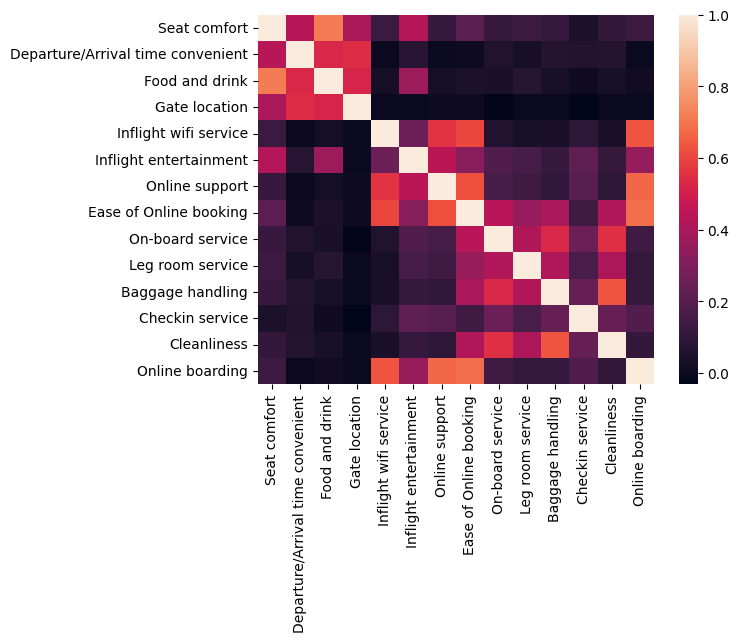

In [33]:
sns.heatmap(data[score_column].corr())

In [34]:
online_service = ['Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','Online boarding']
inflight_service = ['On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness']

In [36]:
number0 = []
for i in range(len(data)):
    try: 
        number0.append(data[score_column].iloc[i,:].value_counts()[0])
    except:
        number0.append(0)

In [37]:
number1 = []
for i in range(len(data)):
    try: 
        number1.append(data[score_column].iloc[i,:].value_counts()[1])
    except:
        number1.append(0)

In [38]:
number2 = []
for i in range(len(data)):
    try: 
        number2.append(data[score_column].iloc[i,:].value_counts()[2])
    except:
        number2.append(0)

In [39]:
number3 = []
for i in range(len(data)):
    try: 
        number3.append(data[score_column].iloc[i,:].value_counts()[3])
    except:
        number3.append(0)

In [40]:
number4 = []
for i in range(len(data)):
    try: 
        number4.append(data[score_column].iloc[i,:].value_counts()[4])
    except:
        number4.append(0)

In [41]:
number5 = []
for i in range(len(data)):
    try: 
        number5.append(data[score_column].iloc[i,:].value_counts()[5])
    except:
        number5.append(0)

In [42]:
data['number0'] = number0
data['number1'] = number1
data['number2'] = number2
data['number3'] = number3
data['number4'] = number4
data['number5'] = number5

<Axes: xlabel='Age', ylabel='Count'>

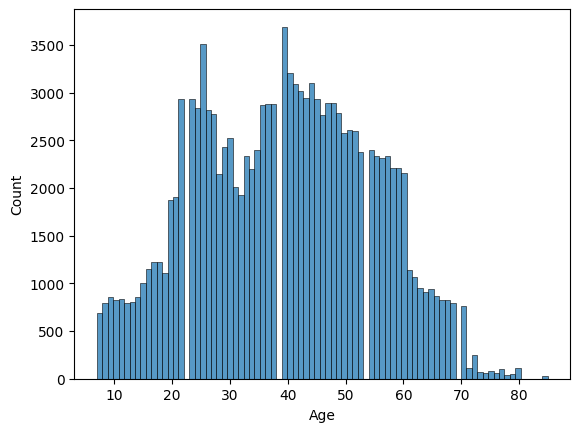

In [43]:
data['Age']
sns.histplot(x='Age',data=X)

In [44]:
bins = [0,19,29,39,49,59,float("inf")]

data['Age_bins'] = pd.cut(data['Age'],bins)
data['Age_bins'].value_counts()

Age_bins
(39.0, 49.0]    29636
(19.0, 29.0]    26179
(29.0, 39.0]    25704
(49.0, 59.0]    23966
(59.0, inf]     12215
(0.0, 19.0]     12180
Name: count, dtype: int64

<Axes: xlabel='Age_bins', ylabel='count'>

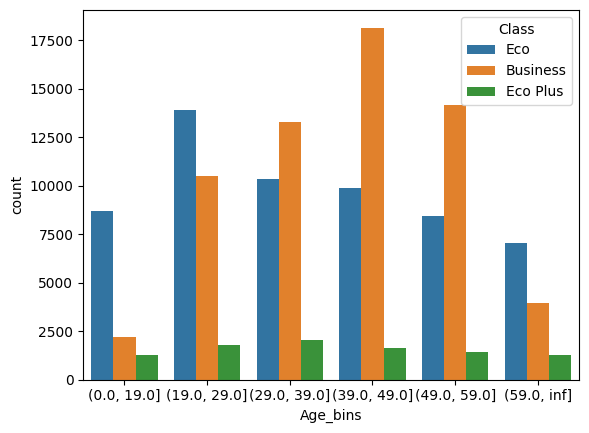

In [45]:
sns.countplot(x = 'Age_bins', data=data, hue = 'Class')

In [46]:
pd.pivot_table(data=data,values = 'satisfaction', aggfunc=np.mean, columns = 'Age_bins', index='Class')

Age_bins,"(0.0, 19.0]","(19.0, 29.0]","(29.0, 39.0]","(39.0, 49.0]","(49.0, 59.0]","(59.0, inf]"
Class,,,,,,
Business,0.530510,0.622830,0.610538,0.793683,0.823130,0.575982
Eco,0.407505,0.320173,0.377533,0.437171,0.438682,0.433281
Eco Plus,0.437795,0.371924,0.412251,0.472671,0.462238,0.420382


In [51]:
data['score_sum'] = np.sum(data[score_column],axis=1)

<Axes: xlabel='score_sum', ylabel='Count'>

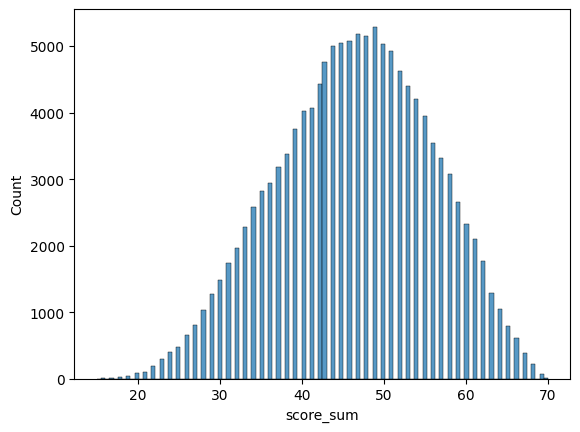

In [52]:
sns.histplot(x='score_sum', data=data)

In [53]:
data

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,relative_Cleanliness,relative_Online boarding,number0,number1,number2,number3,number4,number5,Age_bins,score_sum
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0.928571,-0.071429,4,0,4,4,1,1,"(59.0, inf]",29
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,0.928571,-0.071429,4,0,4,3,3,0,"(39.0, 49.0]",29
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,1.928571,-0.071429,4,0,4,3,3,0,"(0.0, 19.0]",29
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,-0.714286,1.285714,4,4,0,4,2,0,"(59.0, inf]",24
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,-0.214286,2.785714,4,0,4,2,3,1,"(59.0, inf]",31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,0.500000,-1.500000,0,0,4,3,3,4,"(19.0, 29.0]",49
129876,0,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,-0.142857,-1.142857,0,4,5,4,1,0,"(59.0, inf]",30
129877,0,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,0.285714,-0.714286,1,0,4,6,3,0,"(59.0, inf]",38
129878,0,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,-1.357143,-0.357143,0,1,7,6,0,0,"(59.0, inf]",33


In [76]:
y = data['satisfaction']
X = data.drop(['satisfaction'],axis=1)

In [77]:
for i in X.columns:
    if X[i].dtype in ['int64','float64']:
        pass
    else:
        cateogry_columns.append(i)


In [78]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for i in cateogry_columns:
    X[i] = lb.fit_transform(X[i])

In [87]:
X_train.isnull().sum()

Gender                                          0
Customer Type                                   0
Age                                             0
Type of Travel                                  0
Class                                           0
Flight Distance                                 0
Seat comfort                                    0
Departure/Arrival time convenient               0
Food and drink                                  0
Gate location                                   0
Inflight wifi service                           0
Inflight entertainment                          0
Online support                                  0
Ease of Online booking                          0
On-board service                                0
Leg room service                                0
Baggage handling                                0
Checkin service                                 0
Cleanliness                                     0
Online boarding                                 0


In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=8)

In [90]:
from imblearn.over_sampling import SMOTE
resampler = SMOTE()
X_resample, y_resample = resampler.fit_resample(X=X_train,y=y_train)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_resample_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [117]:
rf = RandomForestClassifier()

rf.fit(X_train_resample_scale,y_train)


RandomForestClassifier()

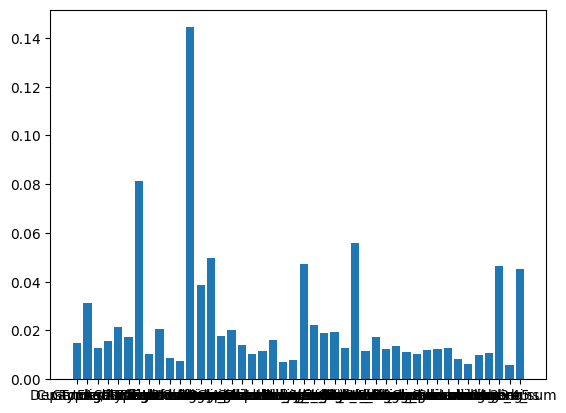

In [118]:
importances = rf.feature_importances_
plt.bar(x= X.columns, height = pd.Series(importances,X.columns))
plt.show()

0.955728364644287


<Axes: >

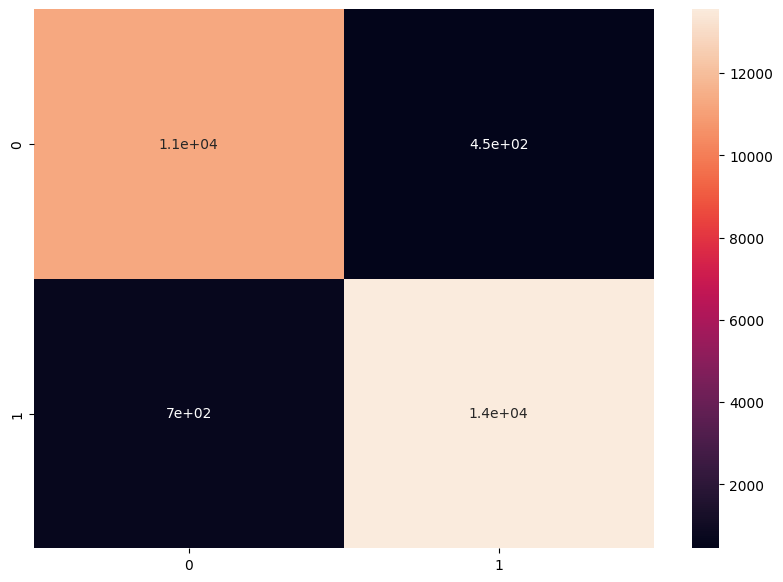

In [119]:
from sklearn.metrics import accuracy_score,confusion_matrix
pred = rf.predict(X_test_scale)

print(accuracy_score(y_test,pred))
mat = confusion_matrix(y_test,pred)
plt.figure(figsize=(10,7))
sns.heatmap(mat, annot=True)


In [120]:
xgb = XGBClassifier()

xgb.fit(X_train_resample_scale,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.9561133353865107


<Axes: >

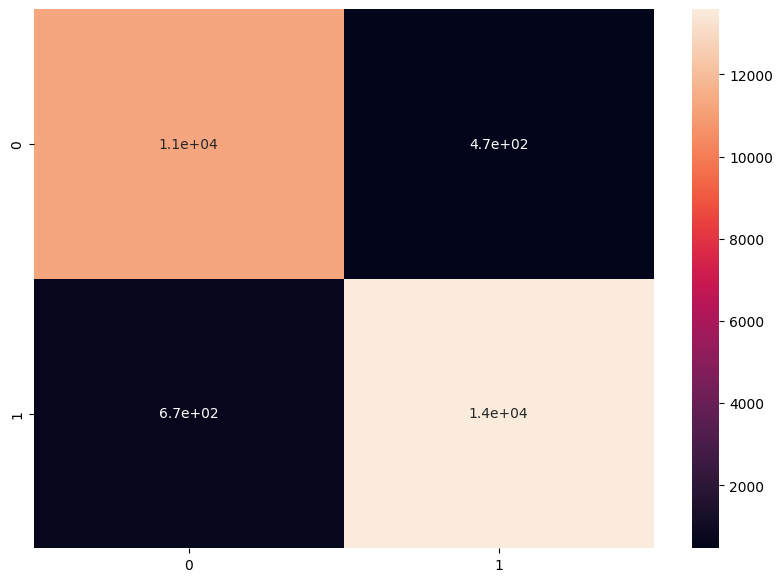

In [121]:
pred = xgb.predict(X_test_scale)

print(accuracy_score(y_test,pred))
mat = confusion_matrix(y_test,pred)
plt.figure(figsize=(10,7))
sns.heatmap(mat, annot=True)

In [122]:
from sklearn.ensemble import StackingClassifier

stacking = StackingClassifier(estimators = [
    ('rf',RandomForestClassifier()),
    ('xgb',XGBClassifier()),
    ('lr',LogisticRegression())
], final_estimator=LogisticRegression())

stacking.fit(X_train_resample_scale,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              intera...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

0.9934252592007533


<Axes: >

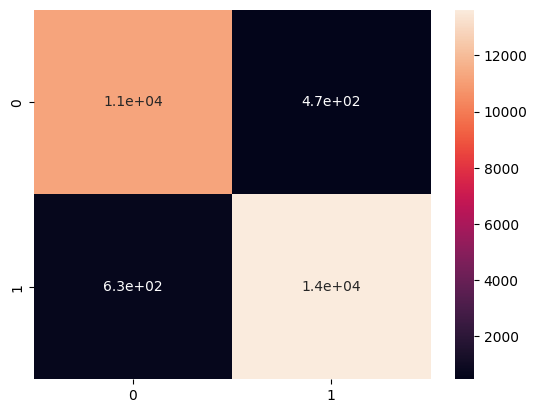

In [123]:
from sklearn.metrics import roc_auc_score
pred = stacking.predict_proba(X_test_scale)[:,1]
print(roc_auc_score(y_test,pred))
mat = confusion_matrix(y_test,pred > 0.5)
sns.heatmap(mat,annot=True)